In [2]:
# Our inital imports to make the font size appropriate and make jupyter notebook as wide as the webpage

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))

In [12]:
# Import appropriate packages and set up nice plotting:

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

# Temporal coherence and quasimonochromatic wave packets 

We proceed similarly as in the previous notebook, except that now the distances are not the same: 

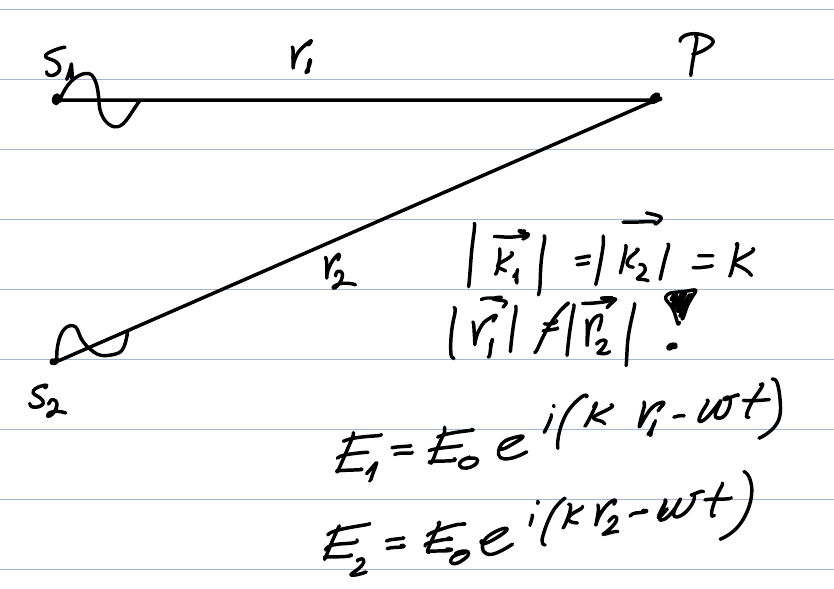

#### To summarize the situation, again:

- Two waves are propagating along two directions, they meet at point P. I know I said multiple times that waves exist everywhere in space but this can be something like a wave packet. So it is limited in space (and, as we will see later, in time). 
- Distances the waves are traversing are NOT the same. This means that the electric field we measure at P originated at different instances of time. We can imagine that S1 and S2 have the same original source, say as in Young's experiment.  
- We will use different spatial grids but the same temporal grid for both waves. 
- We will add electric fields in the end, square them, and average over time to get the measure irradiance. 

Let's go! 

In [4]:
# Wavelength and period in the above given units (don't worry about units so much)
llambda = 1.0
T = 1.0
k = 2.*np.pi / llambda
omega = 2.*np.pi / T

r1 = np.linspace(0,100,1001)
r2 = np.linspace(0,101,1011) # They differ by one exact wavelength! 
t = np.linspace(0,150,1501)

In [5]:
# Define the function that calculates the wave packet: 

def pseudo_harmonic_wave(r,t,omega,k):
    E = np.cos(k*r[:,None] - omega*t[None,:]) # calculate it everywhere for start:
    v = omega / k # speed of the wave
    # ahead of the wave:
    ahead = np.where((r[:,None] - v*t[None,:]) > 10.)
    E[ahead] = 0.0
    # behind 
    behind = np.where(r[:,None]-v*t[None,:] < 0)
    E[behind] = 0.0
    return E

Text(0, 0.5, 'time')

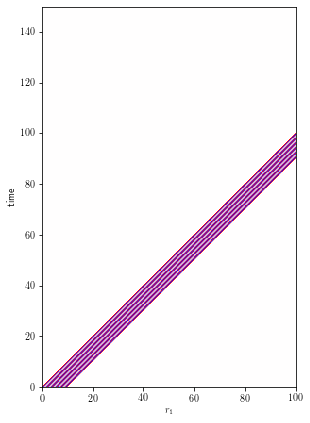

In [6]:
E1 = pseudo_harmonic_wave(r1,t,omega,k)
plt.figure(figsize=[10,7])
plt.imshow(E1.T,origin='Lower',extent = [r1[0],r1[-1],t[0],t[-1]],cmap='bwr')
plt.xlabel("$r_1$")
plt.ylabel("time")

Remember this, I hope you do, this is a wave traveling to the right! 

Now let's calculate the irradiance of the wave, just to remind ourselves how what works. To make that easier, we can make a function:

In [7]:
def calculate_irradiance(E,t):
    t_step = t[1]-t[0]
    t_total = t[-1] - t[0]
    irradiance = np.sum(E**2.0) * t_step / t_total
    return irradiance

In [8]:
I1 = calculate_irradiance(E1[-1,:],t) # this is the irradiance of the first "beam" alone

print("Irradiance produced by only the first beam is : ", I1)

Irradiance produced by only the first beam is :  0.034000000000000086


### Nice, let's now do the both, keeping in mind different spatial grids (we still add them in the same point):

In [9]:
E1 = pseudo_harmonic_wave(r1,t,omega,k)
E2 = pseudo_harmonic_wave(r2,t,omega,k)

In [10]:
I2 = calculate_irradiance(E2[-1,:],t)
I_super = calculate_irradiance(E1[-1,:]+E2[-1,:],t)

print("Irradiance produced by only the first beam is : ", I1)
print("Irradiance produced by only the second beam is : ", I2)
print("Irradiance produced by the superposition of the two beams is : ", I_super)
print("Ratio of the increase is : ", I_super/I1)

Irradiance produced by only the first beam is :  0.034000000000000086
Irradiance produced by only the second beam is :  0.0340000000000002
Irradiance produced by the superposition of the two beams is :  0.12933333333333394
Ratio of the increase is :  3.8039215686274592


Not exactly a factor of 4 but close. Let's see what is happening there, lets plot electric field at P vs the time. 

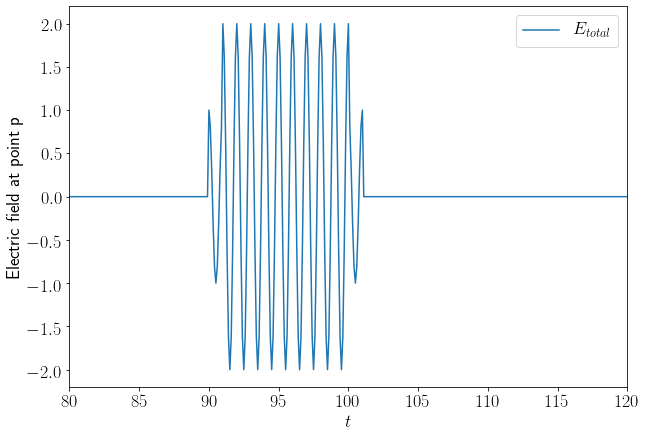

In [13]:
plt.figure(figsize=[10,7])
#plt.plot(t,E1[-1],label='$E_1$')
#plt.plot(t,E2[-1],label='$E_2$')
plt.plot(t,E1[-1]+E2[-1],label='$E_{total}$')
plt.xlabel("$t$")
plt.ylabel("Electric field at point p")
plt.xlim([80,120])
plt.legend()

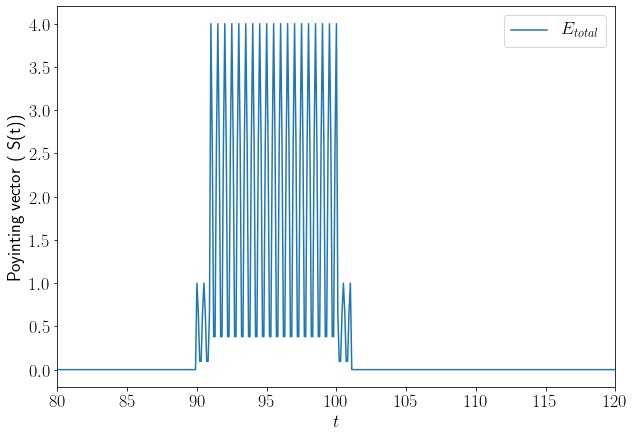

In [14]:
plt.figure(figsize=[10,7])
#plt.plot(t,E1[-1],label='$E_1$')
#plt.plot(t,E2[-1],label='$E_2$')
plt.plot(t,(E1[-1]+E2[-1])**2.0,label='$E_{total}$')
plt.xlabel("$t$")
plt.ylabel("Poyinting vector ( S(t))")
plt.xlim([80,120])
plt.legend()

What is actually happening here is the following: 

- At first we see nothing as no packages arrived to the point P 
- Then we see one package only, for one oscillation
- Then we see both 
- Then we see second only

To emphasize this more, let's re-do this with packages having larger path difference:

In [15]:
r1 = np.linspace(0,100,1001)
r2 = np.linspace(0,105,1051) # They differ by five exact wavelengths!  

E1 = pseudo_harmonic_wave(r1,t,omega,k)
E2 = pseudo_harmonic_wave(r2,t,omega,k)
I2 = calculate_irradiance(E2[-1,:],t)
I_super = calculate_irradiance(E1[-1,:]+E2[-1,:],t)
print("Irradiance produced by only the first beam is : ", I1)
print("Irradiance produced by only the second beam is : ", I2)
print("Irradiance produced by the superposition of the two beams is : ", I_super)
print("Ratio of the increase is : ", I_super/I1)

Irradiance produced by only the first beam is :  0.034000000000000086
Irradiance produced by only the second beam is :  0.034000000000000086
Irradiance produced by the superposition of the two beams is :  0.10266666666666682
Ratio of the increase is :  3.0196078431372517


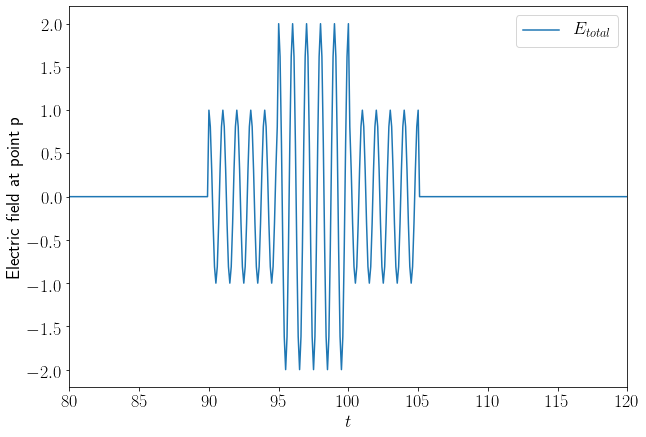

In [16]:
plt.figure(figsize=[10,7])
#plt.plot(t,E1[-1],label='$E_1$')
#plt.plot(t,E2[-1],label='$E_2$')
plt.plot(t,E1[-1]+E2[-1],label='$E_{total}$')
plt.xlabel("$t$")
plt.ylabel("Electric field at point p")
plt.xlim([80,120])
plt.legend()

In [17]:
r1 = np.linspace(0,100,1001)
r2 = np.linspace(0,111,1111) # They differ by five exact wavelengths!  

E1 = pseudo_harmonic_wave(r1,t,omega,k)
E2 = pseudo_harmonic_wave(r2,t,omega,k)
I2 = calculate_irradiance(E2[-1,:],t)
I_super = calculate_irradiance(E1[-1,:]+E2[-1,:],t)
print("Irradiance produced by only the first beam is : ", I1)
print("Irradiance produced by only the second beam is : ", I2)
print("Irradiance produced by the superposition of the two beams is : ", I_super)
print("Ratio of the increase is : ", I_super/I1)

Irradiance produced by only the first beam is :  0.034000000000000086
Irradiance produced by only the second beam is :  0.03400000000000027
Irradiance produced by the superposition of the two beams is :  0.06800000000000037
Ratio of the increase is :  2.0000000000000058


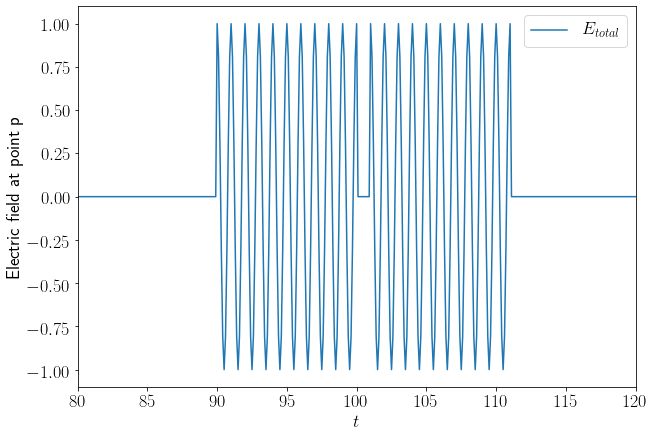

In [18]:
plt.figure(figsize=[10,7])
#plt.plot(t,E1[-1],label='$E_1$')
#plt.plot(t,E2[-1],label='$E_2$')
plt.plot(t,E1[-1]+E2[-1],label='$E_{total}$')
plt.xlabel("$t$")
plt.ylabel("Electric field at point p")
plt.xlim([80,120])
plt.legend()

The logic is the following: 

- The wave packet has limited duration. 
- Two beams need different times to travel -> They partially miss each other
- If they were to completely miss each other: the second waves would either not see anything or would see next packet from the first beam. That next packet would have different (random) phase. 
- Remember we average over many packets, so there would be no coherence. 

### ------------------------------------------------------

### Applying Fourier transform to all this! 

Sadly, we do not have analytical Fourier transform in python, we have numerical one though, it is called FFT (Fast Fourier Transform):

In [20]:
import numpy.fft as fft

In [21]:
# Let's first make a wave limited in time on a t-grid

In [22]:
t = np.linspace(-100,100,4096) # the grid is a bit finer than a usual 
# Let's make it a cosinusoidal wave:
T = 1.0
omega_0 = 2.*np.pi / T
E = np.cos(omega_0 * t)

In [1]:
# You do not have to worry about this, unless you want to. 
# I will be super happy to help about this
E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi



plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([0,10])
plt.subplot(122)
plt.plot(freq/omega_0, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega/ \omega_0$")
plt.ylabel("$I(\omega)$")
plt.xlim([-2,2])
freq.shape
plt.tight_layout()

NameError: name 'fft' is not defined

#### Do you have any ideas why we got two delta functions and not one? What would I have to input to get just one?

Let's now do some other functions, how about a top-hat? 

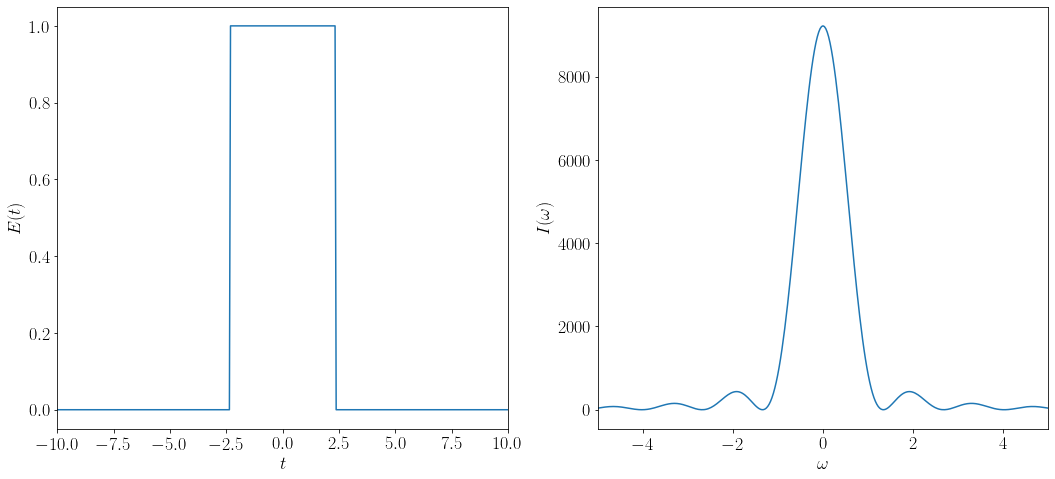

In [35]:
# Top-hat function:
E[:] = 1.0
E[:2000] = 0.0
E[-2000:] = 0.0

E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi

plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.ylabel("$I(\omega)$")
plt.xlabel("$\omega$")
plt.xlim([-5,5])
plt.tight_layout()

What if I made narrower top-hat? What would happen? 

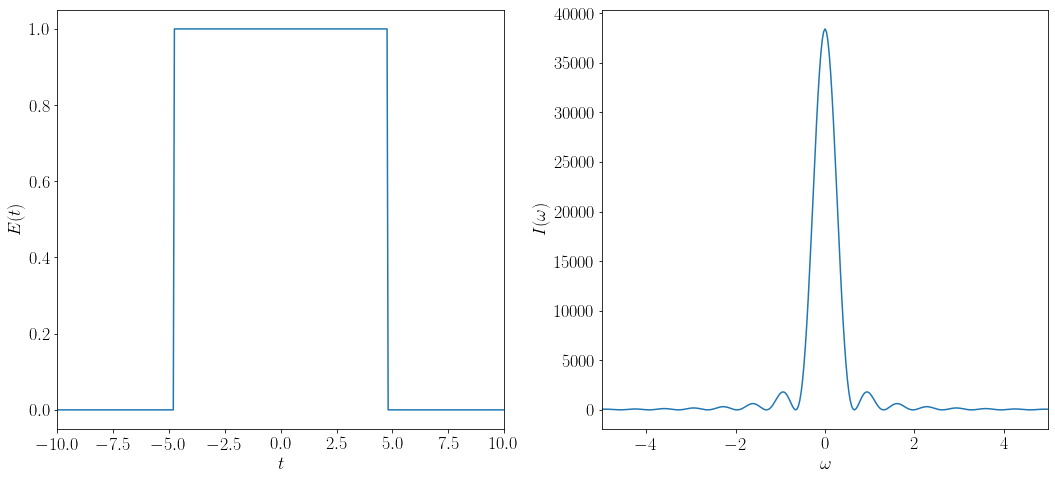

In [36]:
# Top-hat function:
E[:] = 1.0
E[:1950] = 0.0
E[-1950:] = 0.0

E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1]) # these are in units of pixels, we want to convert it to units of time 
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi

plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.ylabel("$E(t)$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.ylabel("$I(\omega)$")
plt.xlabel("$\omega$")
plt.xlim([-5,5])
plt.tight_layout()

### Interesting! 

Try to extrapolate what happens when the top-hat function is infinitely wide, what about when it shrinks to a delta function? (5-6 mins)

Try to convince yourself using some analytical formulas (we did something like this in the class last time):

$ E(t) = 1 $ for $ -T/2<t<T/2$, and $E(t) = 0$ otherwise. 

What is the Fourier transform of this? (analytical solution)

$$F(\omega) = \int_{-\infty} ^{\infty} E(t) e^{-i\omega t} dt $$

Well, this is: 

$$F(\omega) = \int_{-T/2} ^{T/2} e^{-i\omega t} dt $$

Say that $-i \omega t = x$, $dt = \frac{dx}{-i\omega}$

Then we get: 

$$F(\omega) = \frac{1}{-i\omega}\int_{-T/2\times -i \omega} ^{T/2 \times -i \omega} e^x dx $$

which is: 

$$F(\omega) = \frac{T/2}{i \omega T/2}\int_{-i \omega T/2} ^{i \omega T/2} e^x dx $$

$$F(\omega) = \frac{T/2}{i \omega T/2} (e^{i \omega T/2} - e^{-i \omega T/2}) $$
$$F(\omega) \propto \frac{\sin(\omega T/2)}{\omega T/2} = sinc(\omega T/2) $$

Now, let's try and agree that a wavepacket is a product of a top-hat function, and, say a cosine. What would FT of that be?

(4096,)

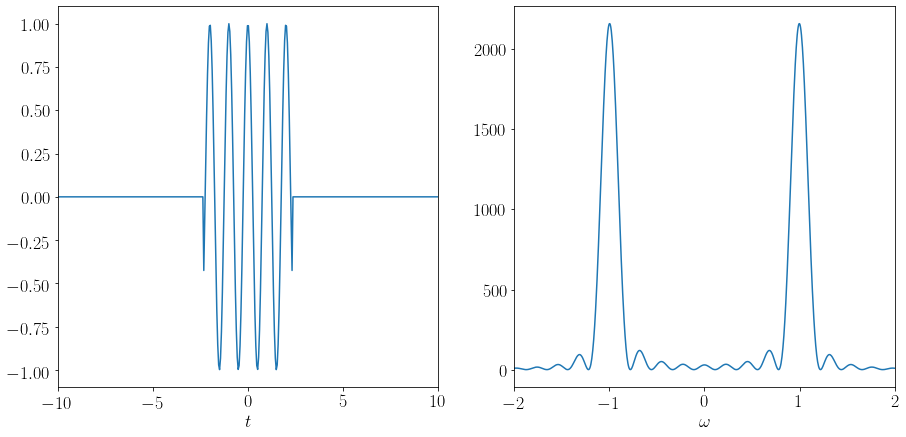

In [105]:
T = 1.0
omega0 = 2*np.pi/T
E = np.cos(omega0 * t)
E[:2000] = 0.0
E[-2000:] = 0.0
E_omega = fft.fft(E)
freq = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fftshift(freq)
E_omega = np.fft.fftshift(E_omega)
freq /= (t[1]-t[0])/2/np.pi
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E)
plt.xlabel("$t$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq/omega0, np.abs(E_omega)**2.0)
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega$")
plt.xlim([-2,2])
freq.shape

Interesting! So, basically, we know now that the fourier transform of a wavepackeet is sinc function. More long the packet, narrower the function:

(4096,)

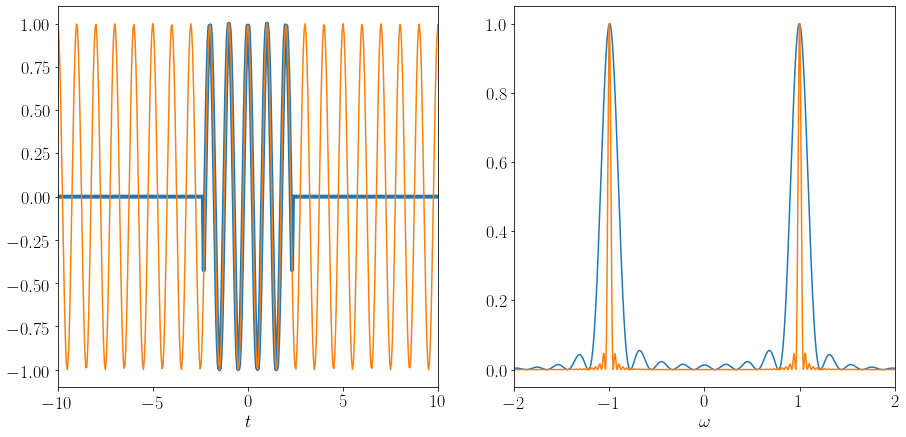

In [109]:
T = 1.0
omega0 = 2*np.pi/T
E_full = np.cos(omega0 * t)
E1 = np.copy(E_full)
E2 = np.copy(E_full)
E1[:2000] = 0.0
E1[-2000:] = 0.0
E2[:1800] = 0.0
E2[-1800:] = 0.0

E_omega1 = fft.fft(E1)
E_omega2 = fft.fft(E2)
freq = np.fft.fftfreq(t.shape[-1])
freq = np.fft.fftshift(freq)
E_omega1 = np.fft.fftshift(E_omega1)
E_omega2 = fft.fft(E2)
E_omega2 = np.fft.fftshift(E_omega2)

I_omega1 = np.abs(E_omega1)**2.0
I_omega2 = np.abs(E_omega2)**2.0

freq /= (t[1]-t[0])/2/np.pi
plt.figure(figsize=[15,7])
plt.subplot(121)
plt.plot(t,E1,linewidth=4)
plt.plot(t,E2)
plt.xlabel("$t$")
plt.xlim([-10,10])
plt.subplot(122)
plt.plot(freq/omega0, I_omega1/np.max(I_omega1))
plt.plot(freq/omega0, I_omega2/np.max(I_omega2))
#plt.plot(freq, E_omega.imag)
plt.xlabel("$\omega$")
plt.xlim([-2,2])
freq.shape